# Neural Machine Translation (English to Bengali)

## Introduction

Language is the heart of communication. There are $\sim7,100$ languages all over the world and hence communication between people belonging to two different cultures and having different languages has always been a challenge. Access to good quality translation as well as requirement has never been so high, which we observe currently. Large number of communications taking place online among people who speak different languages is eased by language technologies like automated machine translation, speech recognition and conversion to native languages, etc.

So, as a part of The 11th Advanced Summer School on NLP (IASNLP-2022) is scheduled to be held at IIIT Hyderabad, India, whose theme revolved around Speech to Speech Machine Translation (SSMT) in Indian Languages, I have worked in developing a Neural Machine Translation Model for English to North-Eastern Language (in my case Bengali). 

## Problem to Solve

There is a lack of literature and good models for English to North-Eastern language machine translation. Hence, it is necessary to explore the possibility of machine translation for these languages from English. Exploration of neural architechtures is what is needed and it is important to look at the performance of these base-line models in terms of machine translation so that further research and work can be put in to train better models or improve on these models.

## Data

### Train Data
The data I will be using for training is the parallel corpus provided by Samanantar dataset. It is a huge corpus of source-wise split parallel corpus of one Indian language to other or English and vice-verse. For our case we were only concerned with English to Bengali part of this dataset.

I took all the $47$ sources for English and Bengali parallel corpus and combined it into a large parallel corpus with $92,51,703$ parallel sentences. I then shuffled the sentences to obtain a homogeneous mixture of parallel sentences from all sources.

| src | tgt |
| --- | --- |
Okay, I'll be right there.| 	ওকে, এখনই আসছি
Give one's lessons.| 	পড়া দেওয়া
Much to the Witnesses' surprise, even the pros...|	সাক্ষীরা অত্যন্ত বিস্মিত হন, এমনকি সরকারি উকিল...
I am at your service.| 	আমি তোমাকে সাহায্য করার জন্যই
Via Facebook Messenger, Global Voices talked w...| 	গ্লোবাল ভয়েসস বাংলা'র পক্ষ থেকে আমরা যোগাযোগ ক...
... 	| 	...
A panel of auditors for auditing listed compan... |	নিরীক্ষা কার্যক্রমে শৃঙ্খলা আনয়নে তালিকাভুক্ত...
On this consideration, and on certain conditio...| 	সে কারণে কতিপয় শর্ত সাপেক্ষে এসব যন্ত্রাংশের ...
Under these rules, fixed price method for IPOs... |	এতে অভিহিত মূল্যে আইপিও’র জন্য ফিক্সড প্রাইস প...
Steps are being taken to introduce rural ratio... |	টিআর ও ভিজিএফ এর পরিবর্তে পল্লী রেশনিং কর্মসূচ...
I propose to rationalize rates and to introduc... |	উৎস কর: উৎস করে কয়েকটি ক্ষেত্রে করহার যৌক্তিক...




Now, due to computational resource and time constraint training on such a large dataset is impossible. Hence, I opt to use $\sim 1.7\%$ of this massive training data.\
I also generated a bigger dataset, which is $\sim8\%$ of the entire training data, which is used in training only a few models.

### Test Data
Now, the test data on which I evaluate the model performance is a set of $\sim250$ parallel sentences taken from Indic WAT 2021.



| src | tgt |
| --- | --- |
Through her work, she spread the message of th...| 	নিজের কর্মেরউদাহরণ স্থাপন করে তিনি মানুষকে সেব...
Interacting with beneficiaries and store owner...| 	সারা দেশের ৫ হাজারেরও বেশি স্থান থেকে দোকান মা...
These include:| 	এই প্রকল্পগুলির মধ্যে রয়েছে-
It is no surprise that today Japan is India’s ...| 	জাপান যে বর্তমানে ভারতের চতুর্থ বৃহত্তম প্রত্য...
Record growth in last two and a half years| 	গত আড়াই বছরেরেকর্ড পরিমাণ অগ্রগতি

## Data Preparation

Machine Learning Models (In our case Deep Learning Models), don't understand raw text data and hence this text data in the form of sentences need to be converted to numerical representation (vectors). So, here I will explain how I prepared the data to be fed to the Neural Network Model.

### Tokenization and Normalization

There are several types of tokenization and normalization methods based on word level, character level and subword level. Each of them has it's benefits and disadvantages ex. word level tokenization requires huge vocabualary, whereas character level requires fixed vocabulary but the input to the neural network i.e. each sentence becomes very large after tokenization and the model also finds it hard to learn relationship between characters.

Hence, I go by subword level tokenization, I use Byte-Pair Encoding to tokenize both the train and test data.\
The Byte-Pair Encoder is trained on the training data(for the bigger training data that is used to generate the byte-pair encoder) for both the source(English) and target(Bengali) languages. I used a vocabulary size of $32,000$ for both English and Bengali language.\
For normalizaion I convert the sentences of lower case and used standard unicode normalization.\
For tokenization the tokenized form of the sentence is a list of integers where the integers stand for the corresponding subword at that index in the vocabualary. I add the `bos`(beginning of sentence) token and the `eos`(end of sentence) token at the start and end of each encoded sentence in both the language. I also have the `unk`(unknown) token for the unknown subwords encountered and and `pad`(padding) token.

For the following two examples the the BPE was trained on the smaller training data and not the bigger one.

ENGLISH SENTENCE:  Actually, it didnt.\
ENGLISH BPE SUBWORDS:  \[ "▁actually", ",", "▁it", "▁didnt", "." ]\
ENGLISH BPE ENCODED: \[ 2597, 31975, 78, 1138, 31972 ]

BENGALI SENTENCE: সত্যি, ব্যাপারটা ও ভাবে নি।\
BENGALI BPE SUBWORDS:\[ "▁সত্যি", ",", "▁ব্যাপারটা", "▁ও", "▁ভাবে", "▁নি", "।" ]\
BENGALI BPE ENCODED:\[ 1569, 31912, 3981, 56, 1225, 57, 31899 ]

### Padding

Neural Network models expect inputs of fixed length. Hence, I set some maximum length of the encoded input which I will feed our model. I take the maximum tokens allowed per sentence as 60. (`MAX_TOKENS = 60`). So, if any tokenized input is less than 60 in length then, it is padded with `pad` token. So, this makes the input data of the same shape and a 2D tensor of `BATCH_SIZE x MAX_TOKENS`. 

Batch-1:\
encoded source shape: (256, 60)\
encoded target shape: (256, 60)\
encoded source example: \[ 3, 2597, 31975, 78, 1138, 31972, 1, 0, 0, ..., 0]\
encoded target example: \[ 3, 1569, 31912, 3981, 56, 1225, 57, 31899, 1, 0, ...., 0]\
decoded source example: actually, it didnt.\
decoded target example: সত্যি, ব্যাপারটা ও ভাবে নি।


The same is done for the the test data, or a sentence, where we encode and pad it to input in the model.

## Models

I focussed only on Transformer based architechtures. I changed the Hyperparameters of the Transformer and trained several of these models to compare their performance.

### Model-1

4 Heads | 8 Heads
--|--
`Number of Layers = 2`|`Number of Layers = 2`|
`Number of Heads = 8`|`Number of Heads = 4`|
`Embedding Dimension = 256`|`Embedding Dimension = 256`|
`Key Dimension = 32`|`Key Dimension = 32`|
`Value Dimension = 32`| `Value Dimension = 32`| 

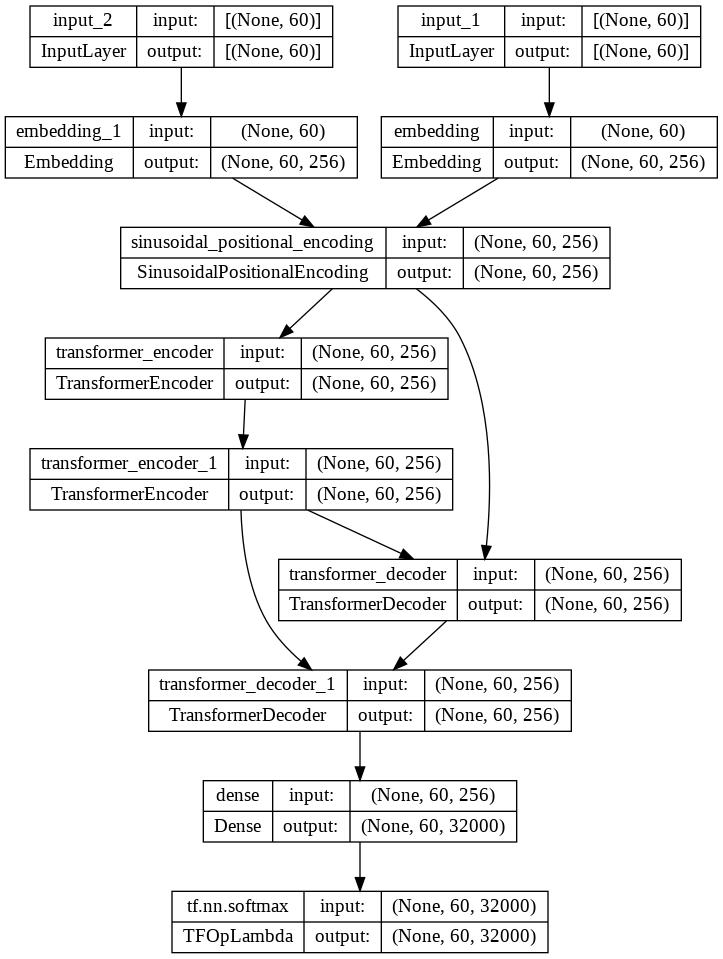

Training Accuracy|Training Loss